In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data Set

In [2]:
df=pd.read_csv("codeforces.tsv",sep="\t")

## Inspect Data Set

In [3]:
df.head()

,contest_id,index,name,points,rating,solved_count,*special,2-sat,binary search,bitmasks,...,number theory,probabilities,schedules,shortest paths,sortings,string suffix structures,strings,ternary search,trees,two pointers
0,1,A,Theatre Square,NaN,1000.0,117144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B,Spreadsheet,NaN,1600.0,13168,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,C,Ancient Berland Circus,NaN,2100.0,3628,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,A,Winner,NaN,1500.0,12176,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,B,The least round way,NaN,2000.0,5644,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(6301, 43)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   contest_id                 6301 non-null   int64  
 1   index                      6301 non-null   object 
 2   name                       6301 non-null   object 
 3   points                     4551 non-null   float64
 4   rating                     6153 non-null   float64
 5   solved_count               6301 non-null   int64  
 6   *special                   6301 non-null   int64  
 7   2-sat                      6301 non-null   int64  
 8   binary search              6301 non-null   int64  
 9   bitmasks                   6301 non-null   int64  
 10  brute force                6301 non-null   int64  
 11  chinese remainder theorem  6301 non-null   int64  
 12  combinatorics              6301 non-null   int64  
 13  constructive algorithms    6301 non-null   int64

In [6]:
df.describe()

,contest_id,points,rating,solved_count,*special,2-sat,binary search,bitmasks,brute force,chinese remainder theorem,...,number theory,probabilities,schedules,shortest paths,sortings,string suffix structures,strings,ternary search,trees,two pointers
count,6301.000000,4551.000000,6153.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,...,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000
mean,722.451040,1492.111624,1876.856818,4134.142517,0.046183,0.002381,0.091573,0.042692,0.146485,0.001587,...,0.064593,0.024123,0.000794,0.025234,0.094112,0.010157,0.072211,0.005713,0.076020,0.041898
std,415.660779,862.025480,667.587948,6937.614086,0.209898,0.048737,0.288445,0.202177,0.353620,0.039809,...,0.245826,0.153444,0.028161,0.156848,0.292008,0.100277,0.258857,0.075377,0.265051,0.200372
min,1.000000,3.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,356.000000,750.000000,1300.000000,456.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,744.000000,1500.000000,1800.000000,1776.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1092.000000,2000.000000,2400.000000,5598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1401.000000,5000.000000,3500.000000,158586.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

contest_id                      0
index                           0
name                            0
points                       1750
rating                        148
solved_count                    0
*special                        0
2-sat                           0
binary search                   0
bitmasks                        0
brute force                     0
chinese remainder theorem       0
combinatorics                   0
constructive algorithms         0
data structures                 0
dfs and similar                 0
divide and conquer              0
dp                              0
dsu                             0
expression parsing              0
fft                             0
flows                           0
games                           0
geometry                        0
graph matchings                 0
graphs                          0
greedy                          0
hashing                         0
implementation                  0
interactive   

# Handling Missing Values

In [8]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()

contest_id                   0
index                        0
name                         0
points                       0
rating                       0
solved_count                 0
*special                     0
2-sat                        0
binary search                0
bitmasks                     0
brute force                  0
chinese remainder theorem    0
combinatorics                0
constructive algorithms      0
data structures              0
dfs and similar              0
divide and conquer           0
dp                           0
dsu                          0
expression parsing           0
fft                          0
flows                        0
games                        0
geometry                     0
graph matchings              0
graphs                       0
greedy                       0
hashing                      0
implementation               0
interactive                  0
math                         0
matrices                     0
meet-in-

In [9]:
df.fillna(df.mode().iloc[0], inplace=True)

# Handling Duplicates

In [10]:
df.drop_duplicates(inplace=True)

# Handling Outliers

In [11]:
specific_cols = ['rating', 'points', 'solved_count']

Q1 = df[specific_cols].quantile(0.25)
Q3 = df[specific_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df[specific_cols] < (Q1 - 1.5 * IQR)) | (df[specific_cols] > (Q3 + 1.5 * IQR))
df.loc[outlier_condition.any(axis=1), specific_cols] = np.nan

In [12]:
df.isnull().sum()

contest_id                     0
index                          0
name                           0
points                       400
rating                       400
solved_count                 400
*special                       0
2-sat                          0
binary search                  0
bitmasks                       0
brute force                    0
chinese remainder theorem      0
combinatorics                  0
constructive algorithms        0
data structures                0
dfs and similar                0
divide and conquer             0
dp                             0
dsu                            0
expression parsing             0
fft                            0
flows                          0
games                          0
geometry                       0
graph matchings                0
graphs                         0
greedy                         0
hashing                        0
implementation                 0
interactive                    0
math      

In [25]:
# Removing duplicates
df.dropna(inplace=True)


# Standardizing categorical values

In [26]:
# Converts all strings to lowercase for consistency

In [14]:
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Exploratory Analysis

# Summary Statistics

In [15]:
df.describe(include="all")

,contest_id,index,name,points,rating,solved_count,*special,2-sat,binary search,bitmasks,...,number theory,probabilities,schedules,shortest paths,sortings,string suffix structures,strings,ternary search,trees,two pointers
count,5901.000000,5901,5901,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,...,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000
unique,NaN,70,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,b,the beaver's problem - 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1077,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,712.927131,NaN,NaN,1517.598204,1924.012879,2946.084054,0.048975,0.002542,0.094730,0.044738,...,0.063718,0.025250,0.000847,0.026436,0.093543,0.010676,0.070835,0.006101,0.079817,0.043213
std,410.696049,NaN,NaN,707.774889,628.650340,3204.565818,0.215834,0.050358,0.292866,0.206746,...,0.244271,0.156897,0.029099,0.160442,0.291217,0.102781,0.256572,0.077875,0.271033,0.203354
min,1.000000,NaN,NaN,3.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,350.000000,NaN,NaN,1000.000000,1500.000000,433.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,735.000000,NaN,NaN,1500.000000,1900.000000,1576.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1077.000000,NaN,NaN,2000.000000,2400.000000,4680.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Univariate Anlaysis

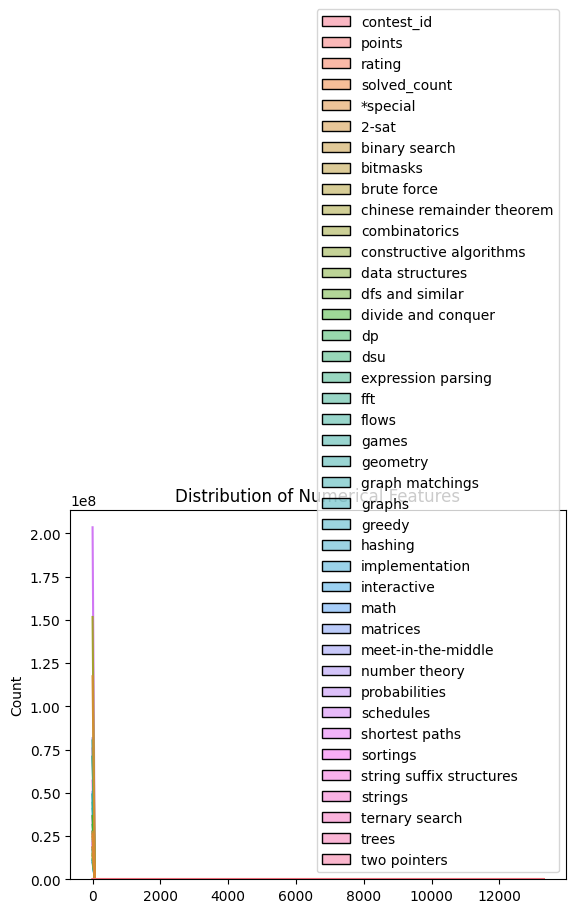

In [16]:
sns.histplot(df.select_dtypes(include=[np.number]), bins=30, kde=True)
plt.title("Distribution of Numerical Features")
plt.show()

# Bivariate Analysis

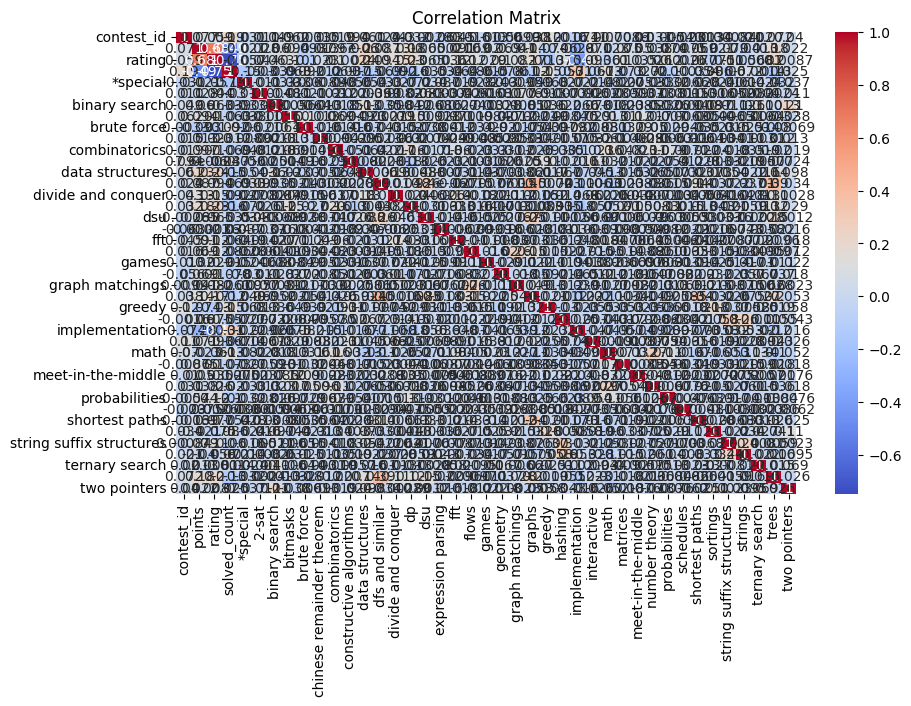

In [20]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])  
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [28]:
# Categorical vs Numerical Variables (Box Plot)

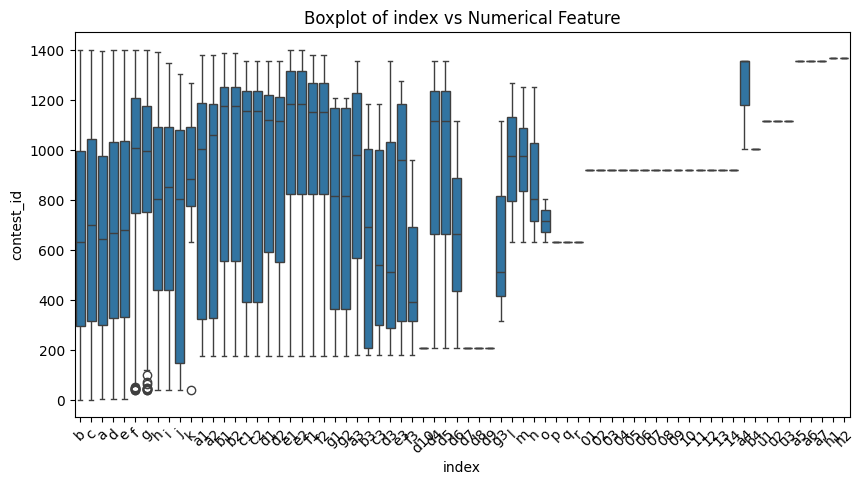

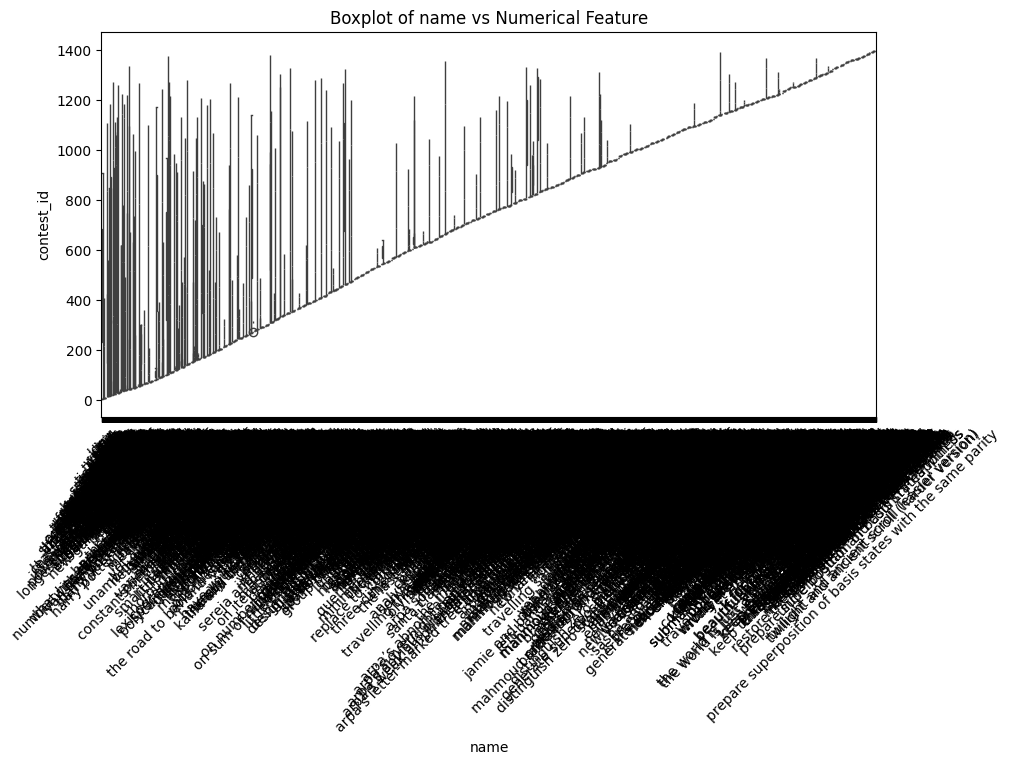

In [29]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y=df.select_dtypes(include=[np.number]).columns[0], data=df)
    plt.xticks(rotation=45)
    plt.title(f"Boxplot of {col} vs Numerical Feature")
    plt.show()

In [30]:
df.to_csv("cleaned_codeforces.csv", index=False)